In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')
        headers = next(reader)
        lines=list(reader)
        
    labels=np.array([r[0] for r in lines], dtype=np.float)
    images=np.array([r[1:785] for r in lines], dtype=np.float)
    
    images = np.array([np.split(r,28) for r in images])
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(training_images,training_labels)

validation_generator = validation_datagen.flow(testing_images, testing_labels)
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28*28 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')]
)

# Compile Model. 
"""
It has to do with the type and shape of the labelled data expected. 'categorical_crossentropy' expects a vector/array 
with one-hot encoding (e.g. 4 categories [0, 1, 0, 0]) per sample. 'sparse_categorical_crossentropy' expects integers 
per example, ranging from 0 to class number. You have the latter format if you followed that data pre-processing instructions.
"""
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
858/858 [==============================] - 116s 135ms/step - loss: 2.5860 - accuracy: 0.2104 - val_loss: 1.8727 - val_accuracy: 0.3986
Epoch 2/15
858/858 [==============================] - 117s 136ms/step - loss: 1.8368 - accuracy: 0.4117 - val_loss: 0.9005 - val_accuracy: 0.7059
Epoch 3/15
858/858 [==============================] - 111s 130ms/step - loss: 1.4108 - accuracy: 0.5438 - val_loss: 0.7471 - val_accuracy: 0.7464
Epoch 4/15
858/858 [==============================] - 111s 129ms/step - loss: 1.1512 - accuracy: 0.6247 - val_loss: 0.6416 - val_accuracy: 0.7642
Epoch 5/15
858/858 [==============================] - 110s 129ms/step - loss: 0.9563 - accuracy: 0.6848 - val_loss: 0.6451 - val_accuracy: 0.7310
Epoch 6/15
858/858 [==============================] - 109s 127ms/step - loss: 0.8414 - accuracy: 0.7217 - val_loss: 0.4050 - val_accuracy: 0.8374
Epoch 7/15
858/858 [==============================] - 100s 117ms/step - loss: 0.7596 - accuracy: 0.7475 - val_loss: 0.2988 -

[201.95825991867244, 0.6429169]

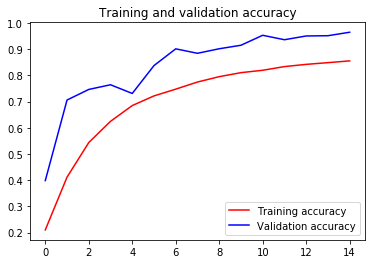

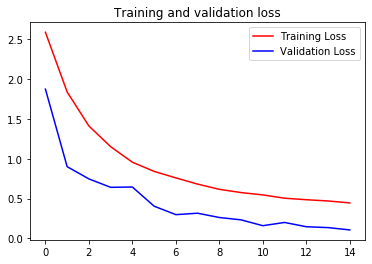

In [11]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);